# E-news Express Project 

# **Index:**


- <a href = #link0>0.Background</a>
- <a href = #link1>1.Explore the dataset and extract insights using Exploratory Data Analysis</a>
- <a href = #link2>2.Do the users spend more time on the new landing page than the old landing page?</a>
- <a href = #link3>3.Is the conversion rate for the new page greater than the conversion rate for the old page?</a>
- <a href = #link4>4.Does the converted status depend on the preferred language?</a>
- <a href = #link5>5.Is the mean time spent on the new page same for the different language users?</a>












# <a name='link0'>**0.	Background**</a>

The E-news Express, an online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

## Objective: 
Determine whether the new landing page is more effective to gather new subscribers or not. 

## Key Questions:
1.	Explore the dataset and extract insights using Exploratory Data Analysis.
2.	Do the users spend more time on the new landing page than the old landing page?
3.	Is the conversion rate for the new page greater than the conversion rate for the old page?
4.	Does the converted status depend on the preferred language? 
5.	Is the mean time spent on the new page same for the different language users?


## Data Description:

1.	user_id - user ID of the person visiting the website.
2.	group - user belongs to the Control group or the Treatment group.
3.	landing_page - whether the landing page is new or old.
4.	time_spent_on_the_page - time (in minutes) spent by the user on the landing page.
5.	converted - whether the user gets converted to a subscriber of the news portal or not.
6.	language_preferred - language chosen by the user to view the landing page.


### Import the necessary libraries - pandas, numpy, seaborn, matplotlib.pyplot

In [1]:
# install the scipy version 1.6.1. and restart the kernel after the successful installation
!pip install scipy==1.6.1

In [2]:
# import the scipy and check the version to be sure that the version is 1.6.1.
import scipy
scipy.__version__

'1.6.1'

In [165]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.
from   scipy.stats import chi2_contingency   # For Chi-Square test 

# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# <a name='link1'>**1.	Explore the dataset and extract insights using Exploratory Data Analysis**</a>


### Load the dataset

In [7]:
data = pd.read_csv('abtest.csv')
# saving a copy of original data into dataframe data0
data0 = data.copy()

### View the first few rows of the dataset

In [8]:
# looking at head (5 observations) 
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


**Observations**
* user_id - This represents the user ID of the person visiting the website.
* group - This represents whether the user belongs to the first group (control) or the second group (treatment).
* landing_page - This represents whether the landing page is new or old.
* time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
* converted - This represents whether the user gets converted to a subscriber of the news portal or not.
* language_preferred - This represents the language chosen by the user to view the landing page.


### Check the shape of the dataset

In [9]:
data.shape

(100, 6)

*The dataset has 100 rows and 6 columns.

### Check the info()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


**Observations**
* All column have 100 observations indicating that there are zero missing values
* group, landing_page, converted, language_preferred should be  categorical variables

# Data Preprocessing

### Fixing the datatypes

In [16]:
# Coverting group, landing_page, converted, language_preferred from Object type to Categorical variables
data['group'] = data.group.astype('category')
data['landing_page'] = data.landing_page.astype('category')
data['converted'] = data.converted.astype('category')
data['language_preferred'] = data.language_preferred.astype('category')


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


### Summary of the data

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


**By default the describe() function shows only the summary of numeric variables only. Let's check the summary of non-numeric variables.**  

In [19]:
data.describe(exclude='number').T

,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,new,50
converted,100,2,yes,54
language_preferred,100,3,French,34


**Observations**
* The variables 'group', 'landing_page', 'converted' each has 2 unique values
* The variables 'language_preferred' has 3 unique values
* There are equal number of observations from both control groups, 50 each
* Out of all 100 observations in the test sample, 54 have converted page


# EDA

### Let us explore the numerical variables first

In [24]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create a boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this helps us write faster and cleaner code.    
    
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

## Observations on Time Spent On The Page


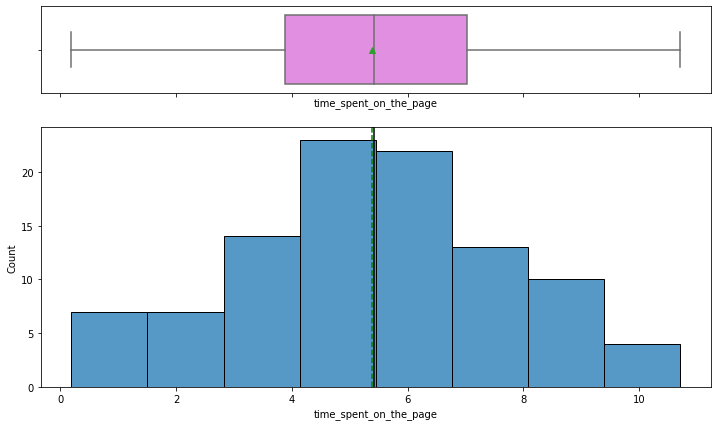

In [27]:
histogram_boxplot(data, 'time_spent_on_the_page')

**Observations**
* Time Spent on Page distribution is close to normal
* There are no outliers

## Let's explore the categorical variables now

In [29]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Observations on Group

<Figure size 720x504 with 0 Axes>

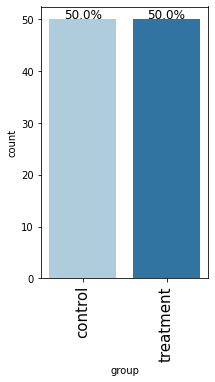

In [31]:
plt.figure(figsize=(10,7))
labeled_barplot(data, 'group', perc=True)

**Observations**
* There are equal number of Control and Treatment observations

## Observations on  Landing Page

<Figure size 720x504 with 0 Axes>

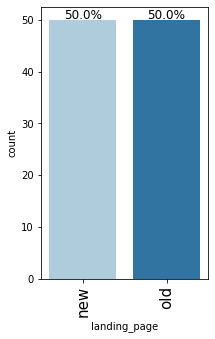

In [32]:
plt.figure(figsize=(10,7))
labeled_barplot(data, 'landing_page', perc=True)

**Observations**
* The observations are uniformally and equally distributed accross both landing pages
* There are equal number of users for both the new and old page

## Observations on  Converted

<Figure size 720x504 with 0 Axes>

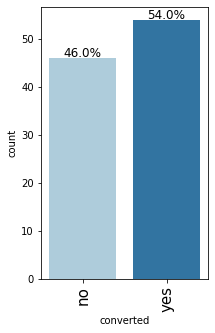

In [33]:
plt.figure(figsize=(10,7))
labeled_barplot(data, 'converted', perc=True)

**Observations**
* 54% of converted observations compared to 46% of non-converted observations

## Observations on  Language Preferred

<Figure size 720x504 with 0 Axes>

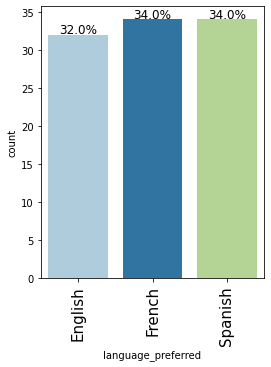

In [35]:
plt.figure(figsize=(10,7))
labeled_barplot(data, 'language_preferred', perc=True)

**Observations**
* There are equal number of French and Spanish preferring users are present in the sample data-set
* The count of English preferring users is slightly less than French and Spanish in the sample data-set


## Bivariate Analysis

**Plot bivariate charts between variables to understand their interaction with each other.**

### Relationship between Converted and Time Spent variables

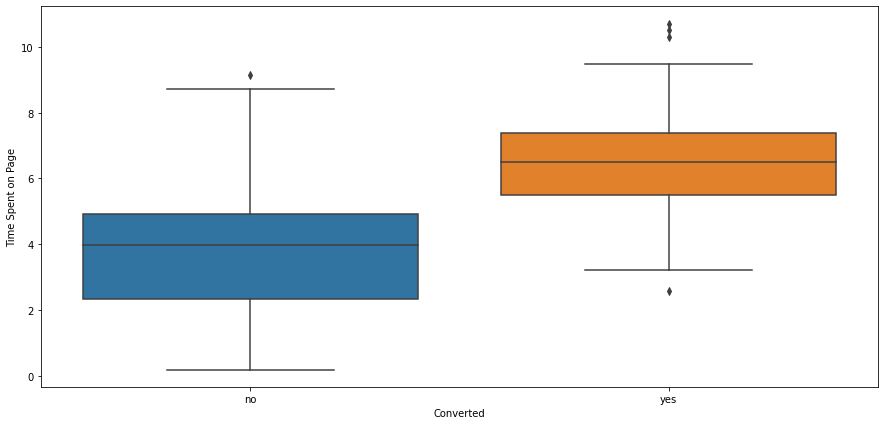

In [47]:
plt.figure(figsize=(15,7))           
sns.boxplot(data['converted'],data['time_spent_on_the_page'])
plt.ylabel('Time Spent on Page')
plt.xlabel('Converted')
plt.show()

**Observations**
* Time spent on page has few outliers.
* There are more numbers of outliers for Converted (yes) cases


### Relationship between Language Preferred and Time Spent variables

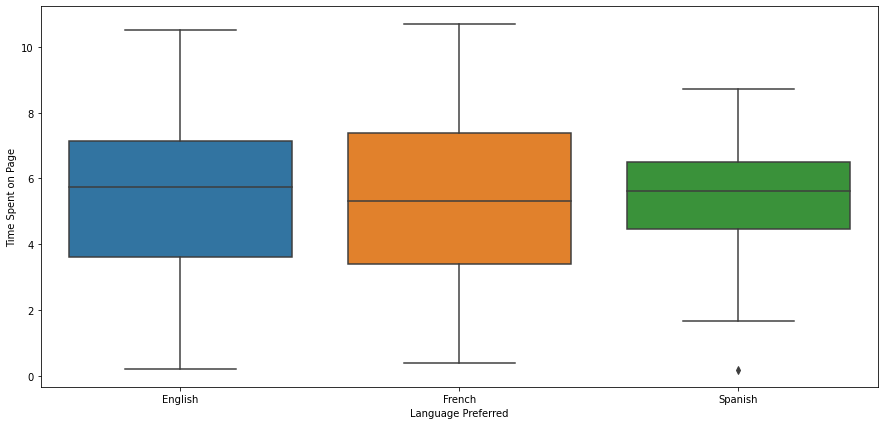

In [189]:
plt.figure(figsize=(15,7))           
sns.boxplot(data['language_preferred'],data['time_spent_on_the_page'])
plt.ylabel('Time Spent on Page')
plt.xlabel('Language Preferred')
plt.show()

**Observations**
* The mean time spent on page is very similar accross all languages 
* There seems to few outliers on time spent for Spanish preferring users
* The Interquartile Range (or IQR) which is the middle 50% of scores (i.e., the range between the 25th and 75th percentile) for Spanish users is smaller than the other two languages. 

### Relationship between Group and Time Spent variables

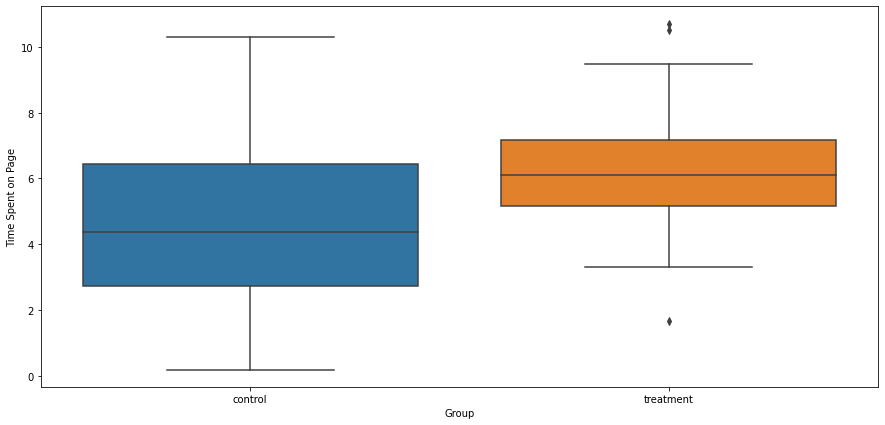

In [191]:
plt.figure(figsize=(15,7))           
sns.boxplot(data['group'],data['time_spent_on_the_page'])
plt.ylabel('Time Spent on Page')
plt.xlabel('Group')
plt.show()

**Observations**
* The control group (old page) has wide whiskers, time spent dispersion (spread) is larger
* The treatment group (new page) has narrower whiskers, indicating There seems to few outliers on time spent for Spanish preferring users
* The Interquartile Range (or IQR) which is the middle 50% of scores (i.e., the range between the 25th and 75th percentile) for Treatment group users is much smaller than the other Control group users. 

In [78]:
# Check if the trend is "time spent on page" is similar across control group, language preference and conversion
data.groupby(by = ['group','language_preferred','converted'])['time_spent_on_the_page'].mean()

group      language_preferred  converted
control    English             no           1.776000
                               yes          5.671818
           French              no           3.669286
                               yes          7.300000
           Spanish             no           3.688000
                               yes          6.457143
treatment  English             no           5.506667
                               yes          7.358000
           French              no           4.400000
                               yes          6.945000
           Spanish             no           4.660000
                               yes          6.476364
Name: time_spent_on_the_page, dtype: float64

**Observations**
* The mean time-spent-on-page is higher for converted class of users compared to those who are not coverted, regardless of which group or language they belong to.

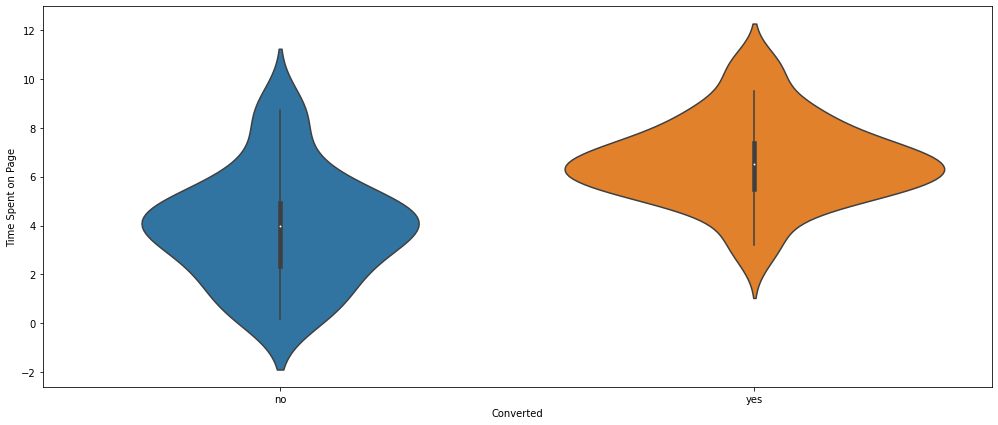

In [199]:
plt.figure(figsize=(17,7))           
sns.violinplot(data['converted'],data['time_spent_on_the_page'])
plt.ylabel('Time Spent on Page')
plt.xlabel('Converted')
plt.show()


**Observations**
* The violin plot helps us see the distribution of quantitative data. We see here that users who converted have spent more time on the site and usuallly hover around 6-7 minutes on average before converting.

## Multivariate Analysis

### Relationship between Time Spent, Converted, and Language

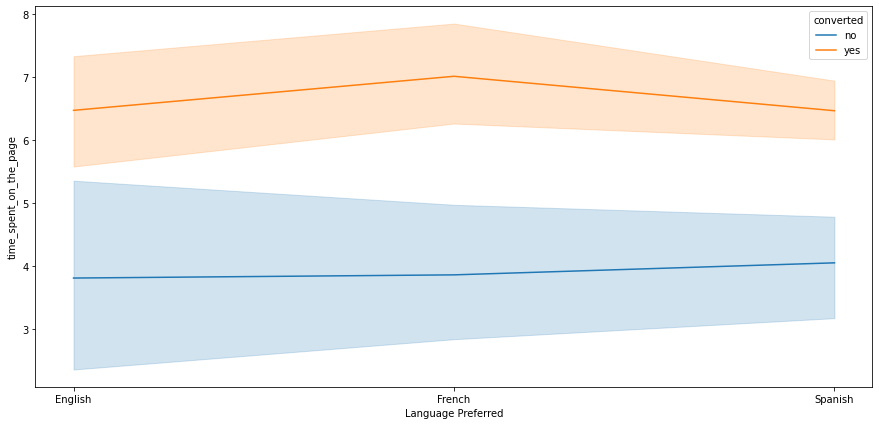

In [205]:
plt.figure(figsize=(15,7))
sns.lineplot(x="language_preferred", y="time_spent_on_the_page", ci=95, data=data, hue='converted')
plt.ylabel('time_spent_on_the_page')
plt.xlabel('Language Preferred')
plt.show()

**Observations**
* Users have spent more time on the page when converted for all languages
* French have spent slighty higher time when converted 


### Relationship between Time Spent, Converted, and Count of users


<Figure size 1080x504 with 0 Axes>

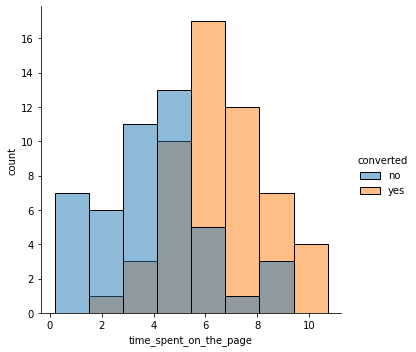

In [206]:
plt.figure(figsize=(15,7))
sns.displot(data=data, x="time_spent_on_the_page", hue="converted") #, kind="kde")
plt.ylabel('count')
plt.xlabel('time_spent_on_the_page')
plt.show()

**Observations**
* This again confirms that users spend more time on the page when converted
* When users has invested ~6 minutes on the page, they usually convert 

# <a name='link2'>**2.	Do the users spend more time on the new landing page than the old landing page?**</a>

### Two Independent Sample T-test for Equality of Means - Unequal Std Dev




Use level of significance $\alpha$ = 0.05

In [129]:
# create separate dataframes for old and new page observations
data_oldpage = data.where(data["landing_page"] == 'old').dropna()
data_newpage = data.where(data["landing_page"] == 'new').dropna()


### Let's check for unequal std dev

In [131]:
stddev_oldpage = data_oldpage["time_spent_on_the_page"].std()
stddev_newpage = data_newpage["time_spent_on_the_page"].std()
print('stddev_oldpage:', stddev_oldpage)
print('stddev_newpage:',stddev_newpage)

stddev_oldpage: 2.581974849306046
stddev_newpage: 1.8170310387878263


* Unequal Std Dev

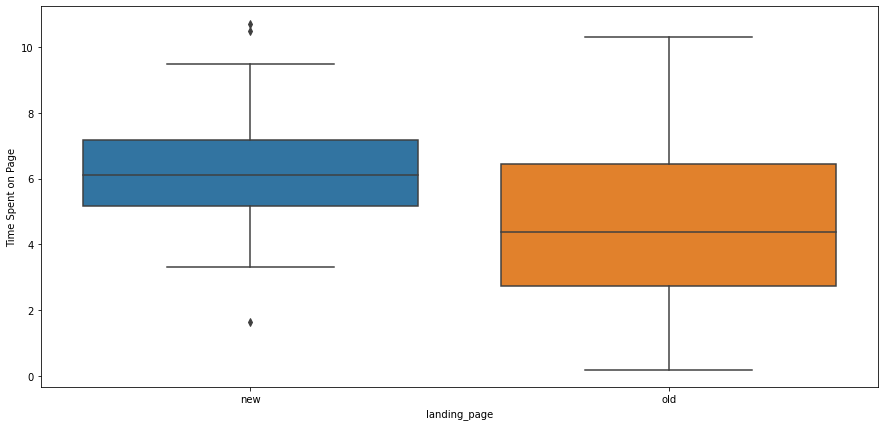

In [209]:
plt.figure(figsize=(15,7))           
sns.boxplot(data['landing_page'],data['time_spent_on_the_page'])
plt.ylabel('Time Spent on Page')
plt.xlabel('landing_page')
plt.show()

**Observations**
*  With help of boxplot, visual analysis shows that time spent on new page by users is greater than time spent on old page

### Let's write the null and alternate hypotheses

Let $\mu_n, \mu_o$ be the mean of time spent on page for new and old page respectively.

We will test the null hypothesis

>$H_0:\mu_n=\mu_o$

against the alternate hypothesis

>$H_a:\mu_n>\mu_o$

### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the "time spent on page" is measured on a continuous scale.
* Since the sample sizes for each group (old and new) is 50 (which is > 30), Central Limit Theorem states that the distribution of sample means will be normal.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

Voila! We can use two sample T-test for this problem.

### Let's find the p-value

In [135]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(data_newpage['time_spent_on_the_page'], data_oldpage['time_spent_on_the_page'], equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Insight
As the p-value (~0.00013) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that time spent on new page by users is greater than time spent on old page

# <a name='link3'>**3.	Is the conversion rate for the new page greater than the conversion rate for the old page?**</a>

<Figure size 1080x504 with 0 Axes>

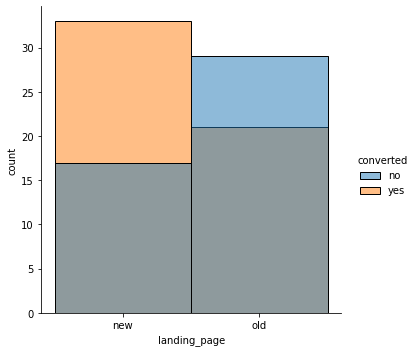

In [215]:
plt.figure(figsize=(15,7))
sns.displot(data=data, x="landing_page", hue="converted") 
plt.ylabel('count')
plt.xlabel('landing_page')
plt.show()

**Observations**
*  With help of displot, visual analysis shows we have more users who converted on the new page vs old page. Shaded gray color show where both yes and no are present.

### Two Proportion Z-test

### Let's revisit the example

The design team of the company has created a new landing page. You randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Conversion rate is defined as the proportion of users who visit the landing page and get converted. 

For new page, there are 33 conversions out of 50 users and for old page, there are 21 conversions out of 50 users. 

At 5% level of significance, do we have enough statistical evidence to conclude that the conversion rate for the new page greater than the conversion rate for the old page

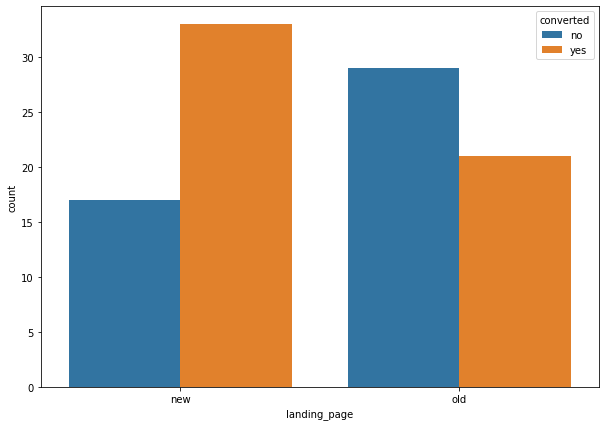

In [228]:
# define the figure and plot; modify the countplot figure size
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(x = 'landing_page', data=data, hue='converted')

**Observations**
*  With help of countplot, visually it appears that the new_page has higher conversion rate compared to old page.

### Let's write the null and alternative hypothesis
Let $p_n,p_o$ be the proportions of users who visit the page and get converted for new and old page respectively.

We will test the null hypothesis

>$H_0:p_n =p_0$

against the alternate hypothesis

>$H_a:p_n > p_o$

### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a user is either converted or not converted.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample of 100 users.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_n = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_n) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_o = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_o) = 50 \cdot \frac{50-21}{50} =29 \geq 10 \\ $

### Let's find the p-value

In [143]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of converted users for new and old page
converted_count = np.array([33, 21])

# set the sample sizes for new and old page
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(converted_count, nobs, alternative='larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Insight
As the p-value 0.008 is much less than the 0.05 level of significance , the null hypothesis can be rejected. There is enough statistical evidence to conclude that the conversion rate for the new page is greater than the old page

# <a name='link4'>**4.	Does the converted status depend on the preferred language?**</a>


### Chi-Square Test for Independence


### Let's revisit the example

The language preference data for each user and their conversion status given in the csv file.

Do we have enough statistical evidence to conclude that converted status depends on preferred language?

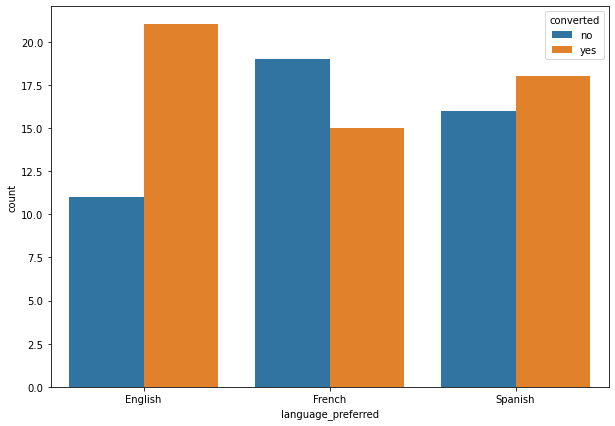

In [227]:
# define the figure and plot; modify the countplot figure size
countplt, ax = plt.subplots(figsize = (10,7))
ax = sns.countplot(x='language_preferred',hue='converted',data=data)

**Observations**
*  With help of countplot, visual analysis shows that the converted status does not depend on language preferred.

## Step 1: Define null and alternative hypotheses


We will test the null hypothesis

>$H_0:$ Converted status is independent on preferred language.

against the alternate hypothesis

>$H_a:$ Converted status is NOT independent on user's preferred language

## Step 2: Select Appropriate test

The formulated hypotheses can be tested using a Chi-square test of independence of attributes, concerning the two categorical variables, language preference and conversion status.

## Step 3: Decide the significance level

Here, we select α= 0.05.

## Step 4: Data Preparation

In [168]:
# prepare the data by create a crosstab of 2x3


data_ct = pd.crosstab(index = data.converted, columns = data.language_preferred)
data_ct.head()


language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


Data is ready in the form of a two-by-three contingency table, with the counts of 'English', 'French', and 'Spanish' in the columns; and the counts of 'Converted status' as yes and no in the rows.

## Step 5: Calculate the p-value

In [166]:
# use chi2_contingency() to find the p-value
chi2, pval, dof, exp_freq = chi2_contingency(data_ct)
# print the p-value
print('The p-value is', pval)

The p-value is 0.21298887487543447


## Step 6: Compare the p-value with $\alpha$

In [225]:
# print the conclusion based on p-value
if pval < 0.05:
    print(f'As the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


## Step 7:  Conclusion

Since the pvalue is > 0.05, we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that converted status is NOT independent of language preferred.

### Insight

Converted status is independent of language preferred. 

# <a name='link5'>**5.	Is the mean time spent on the new page same for the different language users?**</a>

### One-way ANOVA Test

### Let's revisit the example

We want to understand whether mean time spent on the new page is different for different language users? We believe that mean time spent on the new page is same for all language users.

For this purpose, we take random samples from all users that were part of "Treatment" group and given the new page and would like to test if the mean time spent depends on prefered language at 5% significance level.

### Let's create a dataframe that only has rows for new page

In [173]:
data_newpage = data.where(data["landing_page"] == 'new').dropna()
data_newpage.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468.0,treatment,new,7.13,yes,English
2,546462.0,treatment,new,4.40,no,Spanish
4,546459.0,treatment,new,4.75,yes,Spanish
6,546448.0,treatment,new,5.25,yes,French
8,546461.0,treatment,new,10.71,yes,French


Here, times_spent_on_the_page is the response and language_preferred is the factor.

In [174]:
# get the levels of factor language_preferred
data_newpage['language_preferred'].value_counts()

French     17
Spanish    17
English    16
Name: language_preferred, dtype: int64

### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on new page for preferred language types English, French, and Spanish respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one mean (time spent) is different from the rest.


language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


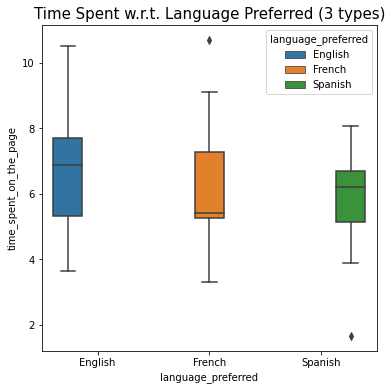

In [230]:
# mean of carbon emission at different levels of the fuel_type factor
print(data_newpage.groupby("language_preferred")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = data_newpage, hue = 'language_preferred')
a.set_title("Time Spent w.r.t. Language Preferred (3 types)", fontsize=15)
plt.show()

**Observations**
*  With help of boxplot, visual analysis shows that the mean time spent on page is between pretty close in range of 5-7 minutes.
*  Time spent IQR for three languages is also in close proximity.

Now, the normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time Spent on New Page follows a normal distribution against

against the alternative hypothesis

>$H_a:$ Time Spent on New Page does not follow a normal distribution

In [176]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(data_newpage['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [178]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( data_newpage['time_spent_on_the_page'][data_newpage['language_preferred']=="English"], 
                                   data_newpage['time_spent_on_the_page'][data_newpage['language_preferred']=="French"], 
                                   data_newpage['time_spent_on_the_page'][data_newpage['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.



### Let's find the p-value

In [185]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, pval = f_oneway(data_newpage.loc[data_newpage['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              data_newpage.loc[data_newpage['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              data_newpage.loc[data_newpage['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(pval))

The p-value is 0.43204138694325955


In [186]:
# print the conclusion based on p-value
if pval < 0.05:
    print(f'As the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Insight
As the p-value is greater than the significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that time spent on new page is different for different languages.

We conclude that the mean time spent on the new page is same for the different language users.


### Addtional Test - Multiple Comparison test (Tukey HSD)

In [188]:
#import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = data_newpage['time_spent_on_the_page'], groups = data_newpage['language_preferred'], alpha = 0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
English  French  -0.4673 0.7259 -2.0035  1.069  False
English Spanish  -0.8285  0.401 -2.3647 0.7078  False
 French Spanish  -0.3612  0.816  -1.874 1.1516  False
-----------------------------------------------------


### Addtional Insight

As the p-values (refer to the p-adj column) for comparing the mean time spent for all pair English, French and Spanish is greater than the significance level, the null hypothesis of equality of all population means can not be rejected.

Thus, we can say that the mean time spent on new page for all languages are not significantly different for each other.

# ---------------------------------------------**The End**-------------------------------------------------